# **Import thư viện**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shutil
import pandas as pd
import shutil
import numpy as np 
import cv2 as cv

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.densenet import DenseNet201

In [ ]:
# Check GPU
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("No GPU")

In [ ]:
tf.__version__

# **1.1. Thống kê dữ liệu ban đầu**

In [ ]:
os.listdir("../input/classification-of-plants-of-southeast-asia")

In [ ]:
path =  "../input/classification-of-plants-of-southeast-asia"
path_train = os.path.join(path, "bali-26_train/bali-26_train")
path_test = os.path.join(path, "bali-26_test/bali-26_test")

In [ ]:
classes = os.listdir(path_train)
dic_class = {}
n_o_train_image = 0
for aclass in classes:
    path_a_class = os.path.join(path_train, aclass)
    dic_class[aclass] = len(os.listdir(path_a_class))
    n_o_train_image += len(os.listdir(path_a_class))

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(*zip(*dic_class.items()))
plt.xticks(rotation ='vertical')
plt.title("Train dataset")
plt.show()

In [ ]:
print("Number of image train:", n_o_train_image)

In [ ]:
print("Number of image test:", len(os.listdir(path_test)))

In [ ]:
dic_class

# **1.2. Tạo folder ảnh tăng cường dữ liệu**

## Sau khi tạo, chuyển augment data vào dataset để dùng cho lần sau (chỉ chạy 1 lần)

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
num_target = 1900

In [ ]:
classes = os.listdir(path_train)
working_dir = "."
new_data_dir = os.path.join(working_dir, "new_data")
if os.path.isdir(new_data_dir):
    shutil.rmtree(new_data_dir)
os.mkdir(new_data_dir)
data = []
for classs in classes:
    os.mkdir(os.path.join(new_data_dir, classs))
    classpath = os.path.join(path_train, classs)
    flist = os.listdir(classpath)
    for f in flist:
        fpath = os.path.join(classpath, f)
        data.append([fpath, classs])
df = pd.DataFrame(columns=['filepaths', 'labels'], data = data)

In [ ]:
df.head()

In [ ]:
gen = ImageDataGenerator(horizontal_flip= True,
                        width_shift_range = 0.25,
                        height_shift_range = 0.2,
                         fill_mode='nearest',
                        zoom_range = 0.2,
                        rotation_range = 30)
groups = df.groupby('labels') # group by class
for label in df['labels'].unique():  # for every class               
    group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
    sample_count=len(group)   # determine how many samples there are in this class  
    if sample_count < num_target:
        aug_img_count=0
        goal = num_target - sample_count
        
        target_dir=os.path.join(new_data_dir, label)  # define where to write the images 
        print(f"Create augment image to {target_dir}")
        aug_gen=gen.flow_from_dataframe(group,  x_col='filepaths', y_col=None, target_size=(IMG_HEIGHT,IMG_WIDTH), class_mode=None,
                                            batch_size=1, shuffle=False, save_to_dir=target_dir, save_prefix='aug_',
                                            save_format='jpg')
        while aug_img_count < goal:
            images=next(aug_gen)            
            aug_img_count += len(images) 

# **2. Load dữ liệu để train**

## Khi train, chạy từ mục 2, thêm dữ liệu augment từ dataset vào input

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shutil
import numpy as np
import cv2 as cv

In [2]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.resnet_v2 import ResNet101V2 

In [3]:
# Check GPU
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("No GPU")

Default GPU Device:/device:GPU:0


2022-06-09 01:25:15.146885: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-09 01:25:15.204071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 01:25:15.386473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 01:25:15.387204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [4]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

In [5]:
path_data = "../input/classification-of-plants-of-southeast-asia/bali-26_train/bali-26_train"
path_augment_data = "../input/newdataset-classificationofplantsofsasia/new_data"

In [6]:
data = []
for klass in os.listdir(path_data):
    classpath = os.path.join(path_data, klass)
    augclasspath = os.path.join(path_augment_data, klass)
    for f in os.listdir(classpath):
        fpath = os.path.join(classpath, f)
        data.append([fpath, klass])
    if os.path.isdir(augclasspath):
        for f in os.listdir(augclasspath):
            fpath = os.path.join(augclasspath, f)
            data.append([fpath, klass])
df = pd.DataFrame(columns=['filepaths', 'labels'], data=data)
df = df.sample(frac=1, random_state=18).reset_index(drop=True)
df

,filepaths,labels
0,../input/newdataset-classificationofplantsofsa...,taro
1,../input/classification-of-plants-of-southeast...,cacao
2,../input/classification-of-plants-of-southeast...,passiflora
3,../input/classification-of-plants-of-southeast...,whitepepper
4,../input/classification-of-plants-of-southeast...,sugarpalm
...,...,...
51024,../input/newdataset-classificationofplantsofsa...,banana
51025,../input/newdataset-classificationofplantsofsa...,passiflora
51026,../input/classification-of-plants-of-southeast...,bamboo
51027,../input/classification-of-plants-of-southeast...,starfruit


<AxesSubplot:xlabel='labels'>

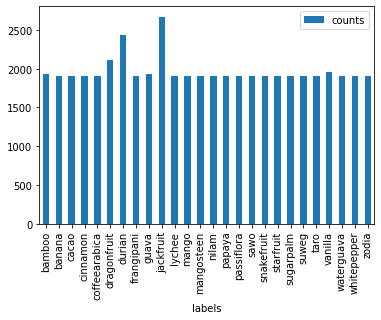

In [7]:
groups = df.groupby(['labels']).size().reset_index(name='counts')
groups.plot.bar(x='labels', y='counts')

In [8]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   fill_mode='nearest',
                                   zoom_range = 0.2,
                                   width_shift_range = 0.15,
                                   height_shift_range = 0.15,
                                   rotation_range = 30,
#                                    brightness_range = [0.8, 1.2],
                                   horizontal_flip= True,
                                   validation_split=0.25)

In [9]:
# train_data = train_datagen.flow_from_directory(path_train, class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE, target_size=(IMG_HEIGHT,IMG_WIDTH), subset="training")
# val_data = train_datagen.flow_from_directory(path_train, class_mode='categorical', batch_size=BATCH_SIZE, target_size=(IMG_HEIGHT,IMG_WIDTH), subset="validation")

In [10]:
train_data = train_datagen.flow_from_dataframe(df,
                                              x_col='filepaths',
                                              y_col='labels',
                                              target_size=[IMG_HEIGHT, IMG_WIDTH],
                                              class_mode='categorical',
                                              batch_size=BATCH_SIZE,
                                              subset='training')
val_data = train_datagen.flow_from_dataframe(df,
                                              x_col='filepaths',
                                              y_col='labels',
                                              target_size=[IMG_HEIGHT, IMG_WIDTH],
                                              class_mode='categorical',
                                              batch_size=BATCH_SIZE,
                                              subset='validation')
labels = train_data.class_indices
labels = dict((v, k) for k, v in labels.items())

Found 38272 validated image filenames belonging to 26 classes.
Found 12757 validated image filenames belonging to 26 classes.


In [11]:
# labels = {0: 'bamboo',1: 'banana',2: 'cacao',3: 'cinnamon',4: 'coffeearabica',5: 'dragonfruit',6: 'durian',7: 'frangipani',8: 'guava',9: 'jackfruit',10: 'lychee',11: 'mango',12: 'mangosteen',13: 'nilam',14: 'papaya',15: 'passiflora',16: 'sawo',17: 'snakefruit',18: 'starfruit',19: 'sugarpalm',20: 'suweg',21: 'taro',22: 'vanilla',23: 'waterguava',24: 'whitepepper',25: 'zodia'}

In [12]:
labels

{0: 'bamboo',
 1: 'banana',
 2: 'cacao',
 3: 'cinnamon',
 4: 'coffeearabica',
 5: 'dragonfruit',
 6: 'durian',
 7: 'frangipani',
 8: 'guava',
 9: 'jackfruit',
 10: 'lychee',
 11: 'mango',
 12: 'mangosteen',
 13: 'nilam',
 14: 'papaya',
 15: 'passiflora',
 16: 'sawo',
 17: 'snakefruit',
 18: 'starfruit',
 19: 'sugarpalm',
 20: 'suweg',
 21: 'taro',
 22: 'vanilla',
 23: 'waterguava',
 24: 'whitepepper',
 25: 'zodia'}

In [13]:
# labels = train_data.class_indices
# labels = dict((v, k) for k, v in labels.items())
# # labels = {0: 'bamboo',1: 'banana',2: 'cacao',3: 'cinnamon',4: 'coffeearabica',5: 'dragonfruit',6: 'durian',7: 'frangipani',8: 'guava',9: 'jackfruit',10: 'lychee',11: 'mango',12: 'mangosteen',13: 'nilam',14: 'papaya',15: 'passiflora',16: 'sawo',17: 'snakefruit',18: 'starfruit',19: 'sugarpalm',20: 'suweg',21: 'taro',22: 'vanilla',23: 'waterguava',24: 'whitepepper',25: 'zodia'}

In [14]:
df

,filepaths,labels
0,../input/newdataset-classificationofplantsofsa...,taro
1,../input/classification-of-plants-of-southeast...,cacao
2,../input/classification-of-plants-of-southeast...,passiflora
3,../input/classification-of-plants-of-southeast...,whitepepper
4,../input/classification-of-plants-of-southeast...,sugarpalm
...,...,...
51024,../input/newdataset-classificationofplantsofsa...,banana
51025,../input/newdataset-classificationofplantsofsa...,passiflora
51026,../input/classification-of-plants-of-southeast...,bamboo
51027,../input/classification-of-plants-of-southeast...,starfruit


# **3. Build model**

# **3.1. InceptionResnetV2 finetune from layer 618**

In [ ]:
# Buil model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
inr_base_model = InceptionResNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')

In [ ]:
x = inr_base_model.output
x = GlobalMaxPooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(26, activation='softmax')(x)

inr_model = Model(inputs=inr_base_model.input, outputs = x)

In [ ]:
for layer in inr_base_model.layers:
    layer.trainable = False

In [ ]:
inr_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = inr_model.fit(train_data, validation_data=val_data, epochs=3, verbose=1)

In [ ]:
for layer in inr_base_model.layers[618:]:
    layer.trainable = True

In [ ]:
inr_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
init_epoch = 12
with tf.device("/gpu:0"):
  history = inr_model.fit(train_data, validation_data=val_data, epochs=init_epoch, verbose=1,
                      callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1,restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1, min_lr=0.00001),
                      ])

In [ ]:
inr_model.save("model_inr_finetune_trainable_618_new_data_again_again_again.h5")
print("Saved!")

In [ ]:
try:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    fig=plt.figure(figsize=(8, 8))
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
except:
    pass

In [ ]:
# path = "../input/model-inr-finetune-trainable-618-new-data-15epoch/model_inr_finetune_trainable_618_new_data_add_10_epoch.h5"
# inr_model = tf.keras.models.load_model(path)

In [ ]:
folder_path='../input/classification-of-plants-of-southeast-asia/bali-26_test/bali-26_test'
images= os.listdir(folder_path)
submissions=[]

for image_file in images:
    img = load_img(folder_path + "/" + image_file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predict=inr_model.predict(img)[0]
    
    idd=image_file
    category=labels[np.argmax(predict)]
    submissions.append([idd,category])
df = pd.DataFrame(columns=['id', 'category'], data=submissions)
df.to_csv('submission_model_inr_finetune_trainable_618_new_data_again_again_again.csv',index=False)

# **3.2.InceptionResnetV2 retrain**

In [ ]:
# Buil model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
inr_model = InceptionResNetV2(
    include_top=True,
    weights=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    classes=26,
    classifier_activation='softmax',
)
inr_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
init_epoch = 12
with tf.device("/gpu:0"):
  history = inr_model.fit(train_data, validation_data=val_data, epochs=init_epoch, verbose=1,
                      callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1,restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1, min_lr=0.00001),
                      ])

In [ ]:
inr_model.save("model_inr_retrain_new_data_again.h5")
print("Saved!")

In [ ]:
folder_path='../input/classification-of-plants-of-southeast-asia/bali-26_test/bali-26_test'
images= os.listdir(folder_path)
submissions=[]

for image_file in images:
    img = load_img(folder_path + "/" + image_file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predict=inr_model.predict(img)[0]
    
    idd=image_file
    category=labels[np.argmax(predict)]
    submissions.append([idd,category])
df = pd.DataFrame(columns=['id', 'category'], data=submissions)
df.to_csv('submission_model_inr_retrain_new_data_again.csv',index=False)

In [ ]:
try:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    fig=plt.figure(figsize=(8, 8))
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
except:
    pass

# **VGG16 finetune from 15**

In [ ]:
# Buil model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
vgg_base_model = VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')
output = vgg_base_model.layers[-1].output
output = Flatten()(output)
output = BatchNormalization()(output)
vgg_base_model = Model(vgg_base_model.input, output)

In [ ]:
x = vgg_base_model.output
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(26, activation = 'softmax')(x)

vgg_model = Model(vgg_base_model.input, x)

In [ ]:
for layer in vgg_base_model.layers:
    layer.trainable = False

In [ ]:
vgg_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = vgg_model.fit(train_data, validation_data=val_data, epochs=3, verbose=1)

In [ ]:
for layer in vgg_base_model.layers[15:]:
    layer.trainable = True

In [ ]:
vgg_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
init_epoch = 12
with tf.device("/gpu:0"):
  history = vgg_model.fit(train_data, validation_data=val_data, epochs=init_epoch, verbose=1,
                      callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1,restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1, min_lr=0.00001),
                          tf.keras.callbacks.ModelCheckpoint("vgg16_checkpoint.h5",monitor="val_loss",verbose=0,save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
                      ])

In [ ]:
vgg_model.save("model_vgg16_finetune_trainable_from_layer15_newdata.h5")
print("Saved!")

In [ ]:
try:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    fig=plt.figure(figsize=(8, 8))
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
except:
    pass

In [ ]:
folder_path='../input/classification-of-plants-of-southeast-asia/bali-26_test/bali-26_test'
images= os.listdir(folder_path)
submissions=[]

for image_file in images:
    img = load_img(folder_path + "/" + image_file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predict=vgg_model.predict(img)[0]
    
    idd=image_file
    category=labels[np.argmax(predict)]
    submissions.append([idd,category])
df = pd.DataFrame(columns=['id', 'category'], data=submissions)
df.to_csv('submission_model_vgg16_finetune_trainable_from_layer15_newdata.csv',index=False)

# **VGG16 fine tune all**

In [ ]:
train_data.reset()
val_data.reset()

In [ ]:
# Buil model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
vgg_base_model = VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')

In [ ]:
x = vgg_base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation = 'relu')(x)
# x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(26, activation = 'softmax')(x)
vgg_model = Model(vgg_base_model.input, x)

sgd = tf.keras.optimizers.SGD(learning_rate = 0.01)
vgg_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# vgg_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
init_epoch = 10
with tf.device("/gpu:0"):
  history = vgg_model.fit(train_data, validation_data=val_data, epochs=init_epoch, verbose=1,
                      callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,verbose=1,restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1, min_lr=0.00001),
#                           tf.keras.callbacks.ModelCheckpoint("vgg16_all_checkpoint.h5",monitor="val_loss",verbose=0,save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
                      ])

In [ ]:
train_data.reset()
val_data.reset()

vgg_model = tf.keras.models.load_model('model_vgg_finetune_all_new_data_sgd.h5')

sgd = tf.keras.optimizers.SGD(learning_rate = 0.000001)
vgg_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
total_epoch = 2
with tf.device("/gpu:0"):
  history2 = vgg_model.fit(train_data, validation_data=val_data, epochs=total_epoch, verbose=1,
                      callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,verbose=1,restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1, min_lr=0.00001),
#                           tf.keras.callbacks.ModelCheckpoint("vgg16_all_checkpoint.h5",monitor="val_loss",verbose=0,save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
                      ])

In [ ]:
print(vgg_model.optimizer.lr)

In [ ]:
history.epoch

In [ ]:
vgg_model.save("model_vgg_finetune_all_new_data_sgd_add_2_epoch.h5")
print("Saved!")

In [ ]:
folder_path='../input/classification-of-plants-of-southeast-asia/bali-26_test/bali-26_test'
images= os.listdir(folder_path)
submissions=[]

for image_file in images:
    img = load_img(folder_path + "/" + image_file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predict=vgg_model.predict(img)[0]
    
    idd=image_file
    category=labels[np.argmax(predict)]
    submissions.append([idd,category])
df = pd.DataFrame(columns=['id', 'category'], data=submissions)
df.to_csv('submission_model_vgg_finetune_all_new_data_sgd_add_2_epoch.csv',index=False)

In [ ]:
try:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    fig=plt.figure(figsize=(8, 8))
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
except:
    pass

# **Resnet 50 finetune all**

In [ ]:
train_data.reset()
val_data.reset()

In [ ]:
# Buil model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
resnet_base_model = ResNet50(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')

In [ ]:
x = resnet_base_model.output
x = AveragePooling2D(pool_size=(7, 7))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(26, activation='softmax')(x)
resnet_model = Model(inputs=resnet_base_model.input, outputs = x)

In [ ]:
resnet_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
init_epoch = 15
with tf.device("/gpu:0"):
  history = resnet_model.fit(train_data, validation_data=val_data, epochs=init_epoch, verbose=1,
                      callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1,restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1, min_lr=0.000001),
                      ])

In [ ]:
resnet_model.save("model_resnet_finetune_trainable_all_new_data.h5")
print("Saved!")

In [ ]:
folder_path='../input/classification-of-plants-of-southeast-asia/bali-26_test/bali-26_test'
images= os.listdir(folder_path)
submissions=[]

for image_file in images:
    img = load_img(folder_path + "/" + image_file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predict=resnet_model.predict(img)[0]
    
    idd=image_file
    category=labels[np.argmax(predict)]
    submissions.append([idd,category])
df = pd.DataFrame(columns=['id', 'category'], data=submissions)
df.to_csv('submission_model_resnet_finetune_all_new_data.csv',index=False)

In [ ]:
try:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    fig=plt.figure(figsize=(8, 8))
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
except:
    pass

# **Resnet50 retrain**

In [ ]:
# Buil model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
resnet_model = ResNet50(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), 
    include_top=True, 
    weights=None,
    classes=26,
    classifier_activation='softmax')
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
resnet_model.summary()

In [ ]:
init_epoch = 15
with tf.device("/gpu:0"):
  history = resnet_model.fit(train_data, validation_data=val_data, epochs=init_epoch, verbose=1,
                      callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1,restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1, min_lr=0.000001),
                      ])

In [ ]:
resnet_model.save("model_resnet_retrain_new_data.h5")
print("Saved!")

In [ ]:
folder_path='../input/classification-of-plants-of-southeast-asia/bali-26_test/bali-26_test'
images= os.listdir(folder_path)
submissions=[]

for image_file in images:
    img = load_img(folder_path + "/" + image_file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predict=resnet_model.predict(img)[0]
    
    idd=image_file
    category=labels[np.argmax(predict)]
    submissions.append([idd,category])
df = pd.DataFrame(columns=['id', 'category'], data=submissions)
df.to_csv('submission_model_retrain_new_data.csv',index=False)

In [ ]:
try:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    fig=plt.figure(figsize=(8, 8))
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
except:
    pass

# **InceptionV3 finetune all**

In [ ]:
# Buil model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
inc_base_model = InceptionV3(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')

In [ ]:
x = inc_base_model.output
x = GlobalMaxPooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(26, activation='softmax')(x)

inc_model = Model(inputs=inc_base_model.input, outputs = x)

In [ ]:
for layer in inc_base_model.layers:
    layer.trainable = False

In [ ]:
inc_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = inc_model.fit(train_data, validation_data=val_data, epochs=3, verbose=1)

In [ ]:
for layer in inc_base_model.layers:
    layer.trainable = True

In [ ]:
inc_model.summary()

In [ ]:
inc_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
init_epoch = 12
with tf.device("/gpu:0"):
  history = inc_model.fit(train_data, validation_data=val_data, epochs=init_epoch, verbose=1,
                      callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1,restore_best_weights=False),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1, min_lr=0.000001),
                      ])

In [ ]:
inc_model.save("model_inceptionV3_finetune_trainable_all_new_data.h5")
print("Saved!")

In [ ]:
try:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    fig=plt.figure(figsize=(8, 8))
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
except:
    pass

In [ ]:
folder_path='../input/classification-of-plants-of-southeast-asia/bali-26_test/bali-26_test'
images= os.listdir(folder_path)
submissions=[]

for image_file in images:
    img = load_img(folder_path + "/" + image_file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predict=inc_model.predict(img)[0]
    
    idd=image_file
    category=labels[np.argmax(predict)]
    submissions.append([idd,category])
df = pd.DataFrame(columns=['id', 'category'], data=submissions)
df.to_csv('submission_model_inceptionV3_finetune_trainable_all_new_data.csv',index=False)

# **DenseNet201**

In [ ]:
# Buil model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
dense_base_model = DenseNet201(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')

In [ ]:
x = GlobalMaxPooling2D()(dense_base_model.output)

x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

x = Dense(26, activation='softmax')(x)

dense_model = Model(inputs=dense_base_model.input, outputs = x)



In [ ]:
for layer in dense_base_model.layers:
    layer.trainable = False

In [ ]:
dense_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = dense_model.fit(train_data, validation_data=val_data, epochs=3, verbose=1)

In [ ]:
for layer in dense_base_model.layers:
    layer.trainable = True

In [ ]:
dense_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
init_epoch = 15
with tf.device("/gpu:0"):
  history = dense_model.fit(train_data, validation_data=val_data, epochs=init_epoch, verbose=1,
                      callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1,restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1, min_lr=0.000001),
                      ])

In [ ]:
dense_model.save("model_dense_finetune_trainable_all_new_data.h5")
print("Saved!")

In [ ]:
try:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    fig=plt.figure(figsize=(8, 8))
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
except:
    pass

In [ ]:
folder_path='../input/classification-of-plants-of-southeast-asia/bali-26_test/bali-26_test'
images= os.listdir(folder_path)
submissions=[]

for image_file in images:
    img = load_img(folder_path + "/" + image_file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predict=dense_model.predict(img)[0]
    
    idd=image_file
    category=labels[np.argmax(predict)]
    submissions.append([idd,category])
df = pd.DataFrame(columns=['id', 'category'], data=submissions)
df.to_csv('submission_model_dense_finetune_trainable_all_new_data.csv',index=False)

# **Resnet101V2 retrain**

In [15]:
resnet_model = ResNet101V2(
    include_top=True,
    weights=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    classes=26,
    classifier_activation='softmax',
                          )
resnet_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

2022-06-09 01:26:43.311130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 01:26:43.312308: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 01:26:43.313236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 01:26:43.314410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 01:26:43.315352: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [17]:
init_epoch = 15
with tf.device("/gpu:0"):
  history = resnet_model.fit(train_data, validation_data=val_data, epochs=init_epoch, verbose=1,
                      callbacks=[
                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1,restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1, min_lr=0.000001),
                      ])

2022-06-09 01:27:11.379906: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-06-09 01:27:22.908004: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1196/1196 [==============================] - 1877s 2s/step - loss: 2.0820 - accuracy: 0.3741 - val_loss: 3.5993 - val_accuracy: 0.2468
Epoch 2/15
1196/1196 [==============================] - 1533s 1s/step - loss: 1.1345 - accuracy: 0.6506 - val_loss: 2.1271 - val_accuracy: 0.5297
Epoch 3/15
1196/1196 [==============================] - 1538s 1s/step - loss: 0.6516 - accuracy: 0.7944 - val_loss: 1.0444 - val_accuracy: 0.7133
Epoch 4/15
1196/1196 [==============================] - 1540s 1s/step - loss: 0.4187 - accuracy: 0.8678 - val_loss: 0.6104 - val_accuracy: 0.8137
Epoch 5/15
1196/1196 [==============================] - 1534s 1s/step - loss: 0.2956 - accuracy: 0.9054 - val_loss: 0.6355 - val_accuracy: 0.8246

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/15
1196/1196 [==============================] - 1581s 1s/step - loss: 0.0902 - accuracy: 0.9726 - val_loss: 0.0432 - val_accuracy: 0.9880
Epoch 7/15
1196/1196 [==============================]

In [18]:
resnet_model.save("model_resnet101V2_retrain_new_data.h5")
print("Saved!")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved!


In [21]:
folder_path='../input/classification-of-plants-of-southeast-asia/bali-26_test/bali-26_test'
images= os.listdir(folder_path)
submissions=[]

for image_file in images:
    img = load_img(folder_path + "/" + image_file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predict=resnet_model.predict(img)[0]
    
    idd=image_file
    category=labels[np.argmax(predict)]
    submissions.append([idd,category])
df = pd.DataFrame(columns=['id', 'category'], data=submissions)
df.to_csv('submission_model_resnet101V2_retrain_new_data.csv',index=False)

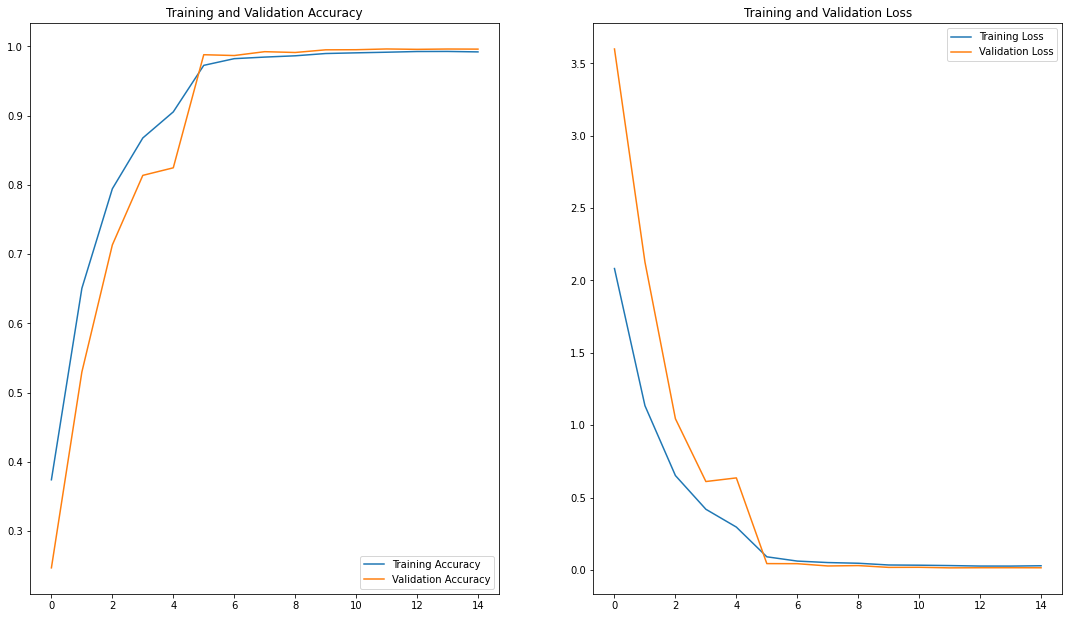

In [20]:
try:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    fig=plt.figure(figsize=(8, 8))
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
except:
    pass